In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

checkout = pd.read_csv(r'//Users//EJEGUS//Desktop//AB Testing DataCamp//checkout.csv')

In [3]:
checkout

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1,F,chrome,66.168628
1,1,876599,A,NaN,0,M,firefox,49.801887
2,2,905407,A,27.446845,1,M,chrome,56.744856
3,3,883562,A,30.602233,1,M,safari,71.890718
4,4,840542,A,29.668895,1,F,safari,67.410696
...,...,...,...,...,...,...,...,...
8995,8995,903591,C,45.395883,1,M,safari,63.291767
8996,8996,883490,C,30.462670,1,F,safari,33.425340
8997,8997,914494,C,34.037979,1,M,chrome,40.575958
8998,8998,897280,C,28.937421,1,F,chrome,30.374843


## Central limit theorem for means

Central limit theorem for means: The Central Limit Theorem states that, given a sufficiently large sample size, the distribution of the sample means will approximate a normal (Gaussian) distribution, regardless of the shape of the population distribution from which the samples are drawn. This approximation becomes more accurate as the sample size increases.

Create a displot select that the correct shape of the distribution of the order_value column filtered on checkout_page 'A'.

In [9]:
order_value2 = checkout[checkout['checkout_page'] == 'A'][['order_value']]

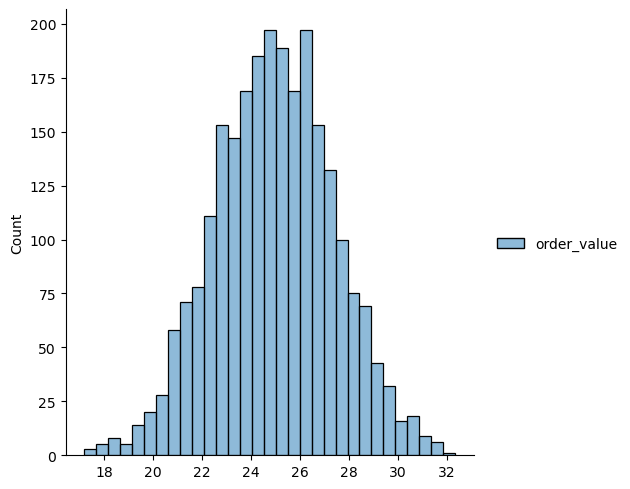

In [11]:
import seaborn as sns
sns.displot(order_value2)
# normal distribution with an avg = 25

In [12]:
np.random.seed(47)

# Create an empty list, then a for loop for 1000 samples of size 5
sampled_means = []

for i in range(100):
    sample = checkout[checkout['checkout_page']=='A']['order_value'].sample(5, replace=True)
    sampled_means.append(sample.mean())

In [15]:
sample

2520    25.255446
536           NaN
630     23.281752
2373    22.238275
1920    28.476335
Name: order_value, dtype: float64

Let's break down the solution to understand how it addresses the exercise requirements:

Setting the Random Seed:

np.random.seed(47)
This line sets the random seed to 47. Setting a seed ensures that the random sampling is reproducible, meaning that every time you run the code, you will get the same random samples. This is useful for debugging and consistency in results.

Creating an Empty List:

sampled_means = []
Here, we initialize an empty list called sampled_means. This list will be used to store the means of the samples we take.

For Loop for Sampling:

for i in range(1000):
This line starts a for loop that will iterate 1000 times. Each iteration represents one sample of size 5.

Taking a Sample with Replacement:

sample = checkout[checkout['checkout_page']=='A']['order_value'].sample(5, replace=True)
Inside the loop, we take a sample of size 5 from the order_value column of the checkout DataFrame, but only for rows where the checkout_page is 'A'. The sample method is used with the replace=True argument, which means sampling is done with replacement. This allows the same data point to be picked more than once in a single sample.

Storing the Sample Mean: Although not explicitly shown in the provided solution, the next logical step would be to calculate the mean of the sample and append it to the sampled_means list. This step is implied but not included in the provided code snippet. It would look something like this:

sampled_means.append(sample.mean())
By following these steps, the solution successfully simulates the means taken from 1000 samples of size 5 each with replacement and stores the results in the sampled_means list. This meets the exercise's requirements.

In [18]:
sampled_means.append(sample.mean())

In [20]:
sampled_means

[24.368656638,
 23.97348537666667,
 24.446736008000002,
 24.643636763333333,
 27.7230573525,
 25.1932357075,
 26.731092942500002,
 27.380293786000003,
 26.960652458,
 22.61989711,
 23.63254396,
 24.118097706666664,
 24.130113935,
 23.7278987125,
 26.032896806666667,
 24.6640298425,
 25.162435164000005,
 25.0358176275,
 23.149914067999998,
 24.39390022,
 23.0206994175,
 25.70922702,
 24.275515555,
 24.9147483025,
 24.79090712,
 24.1000762525,
 23.04879802,
 23.6692589525,
 22.7887066275,
 25.257645462499998,
 24.9667078,
 27.5612971675,
 25.254928758,
 24.998408579999996,
 24.99481307,
 25.822135364,
 25.13037484,
 25.348278435,
 25.269774264999995,
 23.858284948,
 25.418968008,
 22.3463376675,
 25.308026789999996,
 26.617438593333333,
 27.217908483333332,
 25.79271399,
 23.951951846666663,
 22.836962046,
 25.97394357,
 24.5264077325,
 24.900000830000003,
 25.7737935425,
 24.4211288875,
 23.993469352,
 24.37833687,
 24.143654582000003,
 24.462565242,
 27.61471896,
 25.363735622,
 25.137

In [22]:
# the bigger the sample size the closer we get to the true mean which is 25
np.mean(sampled_means)

25.03175103172772

Plot the distribution of the sampled_means list.

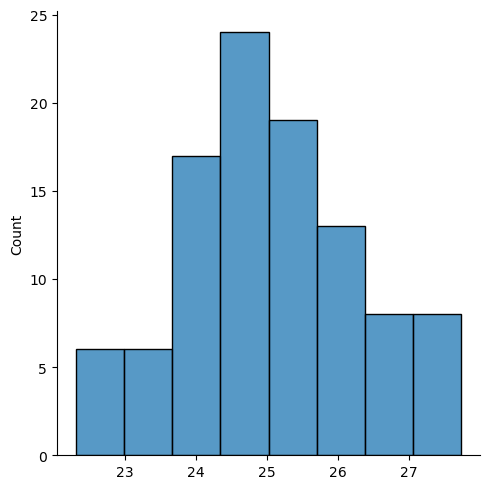

In [25]:
sns.displot(sampled_means)

Excellent work! Note how even for a small sample size of five, the sampling distribution of the means still resembles a normal one since the underlying data is already normally distributed.

## Plotting power curves

Performing a power analysis prior to running an A/B test is one of the most important steps.
It enables us to improve our chances of reaching conclusive results and better plan for resources and time allocated to each test. Moreover, plotting power curves makes it easier to visualize the impact of varying certain parameters on the required sample size to hit the desired levels of confidence. Although a larger sample size betters our chances of reaching a conclusive result, gathering additional units or spending more time is a waste of resources as the power curves saturate.

Practical Usage
Determining Sample Size: This plot helps researchers determine the sample size needed to achieve a desired level of power for detecting a specific effect size. For instance, if a researcher wants to achieve a power of 0.8 for detecting an effect size of 0.2, they can look at the plot to find the minimum sample size required.
Planning Studies: It is useful in the planning phase of studies to ensure that they are adequately powered to detect the expected effects, reducing the risk of Type II errors (failing to detect a true effect).

In [30]:
# Create NumPy arrays for the sample_sizes ranging from 10 to 600, and effect_sizes of 0.1, 0.2, and 0.3.
sample_sizes = np.array(range(10,600))
effect_sizes = np.array([0.1, 0.2, 0.3])


In [32]:
from statsmodels.stats.power import TTestIndPower

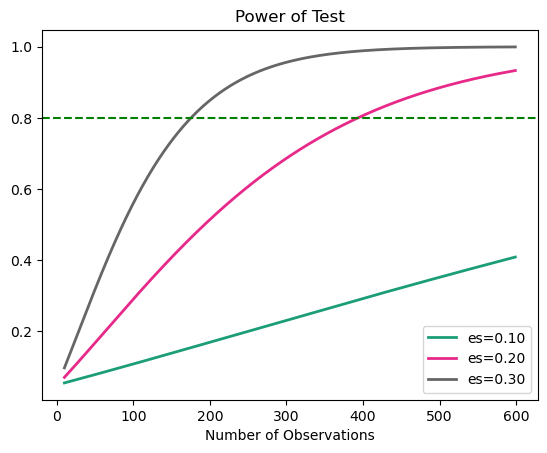

In [34]:
fig, ax = plt.subplots()
TTestIndPower().plot_power(ax=ax, nobs=sample_sizes, effect_size=effect_sizes)
ax.axhline(y=0.8, color='green', linestyle='--')


Adjust the NumPy arrays for the sample_sizes ranging from 10 to 2000, and effect_sizes of 0.1, 0.2, and 0.3.

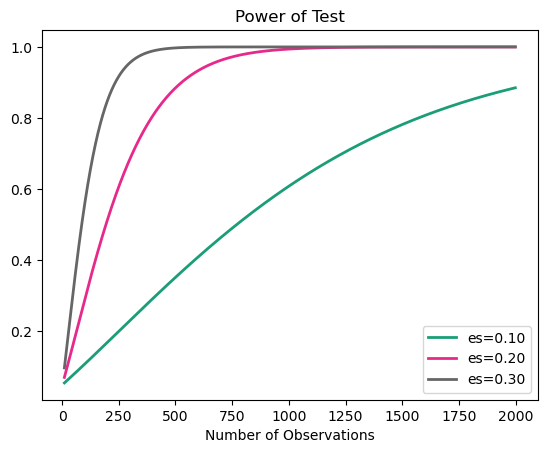

In [37]:
# Adjust the parameters for power analysis
sample_sizes = np.array(range(10,2000))
effect_sizes = np.array([0.1, 0.2, 0.3])

# Plot power curves
TTestIndPower().plot_power(nobs=sample_sizes, effect_size=effect_sizes)
#ax.axhline(y=0.8, color='green', linestyle='--')
plt.show()

When designing an A/B test, you as a Data Scientist are responsible for checking if a test is feasible in the first place. This entails answering several questions such as: do we have enough traffic? How do we quantify "enough"? What is the minimum difference we can detect given the sample size we have? How long does an experiment need to run? And more.

In this exercise, you will calculate the minimum sample size required to capture a statistically significant difference of a certain value between the baseline mean order_value for the control group, and a new design to be tested.pandas, numpy,matplotlib, seaborn libraries and the checkout DataFrame are already imported and loaded for you, as well as power from statsmodels.stats.

In [40]:
checkout.head()

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1,F,chrome,66.168628
1,1,876599,A,NaN,0,M,firefox,49.801887
2,2,905407,A,27.446845,1,M,chrome,56.744856
3,3,883562,A,30.602233,1,M,safari,71.890718
4,4,840542,A,29.668895,1,F,safari,67.410696


In [42]:
# Calculate the mean and standard deviation of order_value column of checkout_page 'B'.

mean_B = checkout[checkout['checkout_page'] == 'B']['order_value'].mean()
print(mean_B)

std_B = checkout[checkout['checkout_page'] == 'B']['order_value'].std()
print(std_B)

29.87620233154742
7.277644184742467


Assign the mean_new value of $31 as our practical significance level and use the formula shown in the video for calculating the standard effect size for means.

In [45]:
# Define mean_new and calculate the standardized effect size
mean_new = 31

std_effect_size = (mean_new-mean_B)/std_B
print(std_effect_size)


0.15441778134861453


Calculate the required sample size per group given the default parameters for power and significance level.

In [48]:
# Calculate the required sample size
# Import t-test power package
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats import power

sample_size = power.TTestIndPower().solve_power(effect_size=std_effect_size, power=.80, alpha=.05, nobs1=None)

print(sample_size)

659.2892380748207


Remarkable job! 660 is the approximate sample size needed per group to at least capture a difference of a dollar between the baseline group and the new page design if the new design actually has that effect or larger.

Why You Need This Code:
Effect Size:

The effect size (std_effect_size) is a measure of the magnitude of the difference you expect or hope to detect between the two groups.
The code uses this effect size to determine how many observations are needed to reliably detect this difference.
Power and Alpha:

The power parameter is set to 0.80, indicating an 80% chance of detecting the effect if it exists.
The alpha parameter is set to 0.05, controlling the Type I error rate.
Solving for Sample Size:

The solve_power method calculates the total sample size needed to achieve the specified power and significance level for the given effect size.
This ensures your test is designed to detect meaningful effects while controlling for Type I and Type II errors.
In Summary:
Simply setting 
𝛼
=
0.05
α=0.05 defines the threshold for statistical significance but does not ensure that your test has enough power to detect an effect. The code calculates the necessary sample size to achieve adequate power, ensuring that your test is both statistically and practically valid. This step is essential for making reliable conclusions from your A/B test.

## Multiple Comparisons Test

Imagine you are a Data Scientist working for a subscription company. The web design team is working on finding the perfect CTA (call-to-action) button to urge page visitors to sign up for their service. They presented you with 4 different designs besides the current version.

After running an experiment comparing each variant to the control, you generated a list of p-values loaded in the pvals variable. Comparing them directly to the significance threshold would result in an inflated Type I error rate. To avoid this, you can use the smt.multipletests() function from Python's statsmodels library to correct the p-values and test for statistical significance with a FWER = 5%.

In [54]:
#Perform a Bonferroni correction to the list of p-values using alpha = 0.05.
import statsmodels.stats.multitest as smt

pvals = [0.0126, 0.0005, 0.00007, 0.009]

# Perform a Bonferroni correction and print the output
corrected = smt.multipletests(pvals, alpha = 0.05, method = 'bonferroni')

print('Significant Test:', corrected[0])
print('Corrected P-values:', corrected[1])
print('Bonferroni Corrected alpha: {:.4f}'.format(corrected[3]))

Significant Test: [False  True  True  True]
Corrected P-values: [0.0504  0.002   0.00028 0.036  ]
Bonferroni Corrected alpha: 0.0125


In [56]:
# Perform a Sidak correction and print the output
corrected = smt.multipletests(pvals, alpha = .05, method = 'Sidak')

print('Significant Test:', corrected[0])
print('Corrected P-values:', corrected[1])
print('Sidak Corrected alpha: {:.4f}'.format(corrected[3]))

# Looks like the results have changed and the hypothesis corresponding to the first p-value is now rejected!
#Since the Bonferroni correction is the strictest method, 
#other corrections may flip the results for the edge cases.

Significant Test: [ True  True  True  True]
Corrected P-values: [0.04945542 0.0019985  0.00027997 0.03551691]
Sidak Corrected alpha: 0.0125


## Data Cleaning and Exploration

In [59]:
checkout.head()

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1,F,chrome,66.168628
1,1,876599,A,NaN,0,M,firefox,49.801887
2,2,905407,A,27.446845,1,M,chrome,56.744856
3,3,883562,A,30.602233,1,M,safari,71.890718
4,4,840542,A,29.668895,1,F,safari,67.410696


In [61]:
# Calculate the mean, standard deviation and count of the purchased column by checkout_page in one line of code.
checkout.groupby('checkout_page')['purchased'].agg({'mean','std','count'})

,std,count,mean
checkout_page,,,
A,0.383974,3000,0.820333
B,0.360048,3000,0.847000
C,0.338909,3000,0.867667


In [63]:
checkout.purchased.value_counts()

purchased
1    7605
0    1395
Name: count, dtype: int64

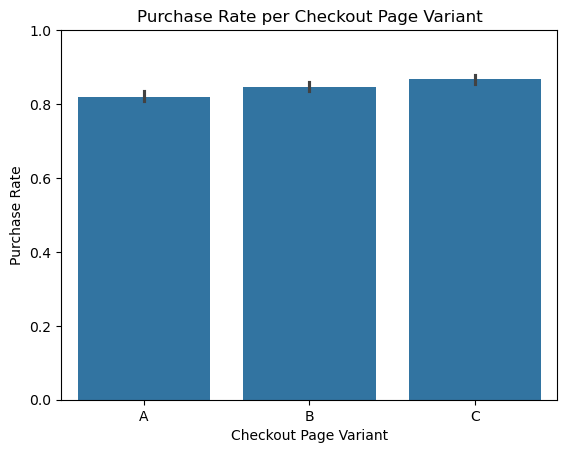

In [65]:
# Create a bar plot of average purchase rate per checkout_page.
sns.barplot(x=checkout['checkout_page'], y=checkout['purchased'], estimator=np.mean)
plt.ylim(0, 1)
plt.title('Purchase Rate per Checkout Page Variant')
plt.xlabel('Checkout Page Variant')
plt.ylabel('Purchase Rate')
plt.show()

Consider yourself a Data Analyst about to start digging into A/B testing data at the initial EDA stage before running any statistical tests. See what you can find in the data that looks interesting to you. AdSmart and checkout DataFrames, as well as pandas as pd, NumPy and np, Matplotlib.pyplot as plt, and Seaborn as sns, have already been loaded for you.

https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing?resource=download&select=AdSmartABdata+-+AdSmartABdata.csv

In [68]:
AdSmart = pd.read_csv(r'//Users//EJEGUS//Desktop//AB Testing DataCamp//AdSmartABdata - AdSmartABdata.csv')

In [70]:
AdSmart

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


/var/folders/p_/47c1l4ln21l4ts84bdv0kk840000gq/T/ipykernel_3207/315316169.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=AdSmart, x='date', y='no', hue='experiment', ci=False)


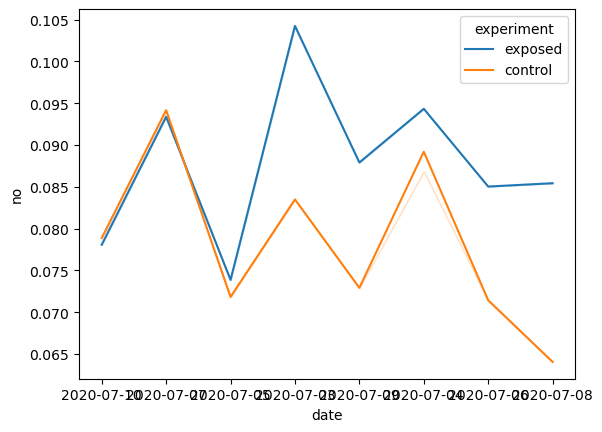

In [72]:
# Plot the proportion of 'no' responses over experiment duration per experiment variant in the AdSmart dataset.

sns.lineplot(data=AdSmart, x='date', y='no', hue='experiment', ci=False)
plt.show()

In [73]:
# Check for duplicate rows in the AdSmart dataset by printing number of rows.
print(len(AdSmart))
len(AdSmart.drop_duplicates(keep='first'))

8077


8077

In [76]:
# Calculate the number of unique users in group B, then compute two different metrics: 
# one looks at the unique users who signed up at least one time, and another that sums up all signups in the group.



In [78]:
checkout.head()

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1,F,chrome,66.168628
1,1,876599,A,NaN,0,M,firefox,49.801887
2,2,905407,A,27.446845,1,M,chrome,56.744856
3,3,883562,A,30.602233,1,M,safari,71.890718
4,4,840542,A,29.668895,1,F,safari,67.410696


In [80]:
# Calculate the number of unique users in group B, then compute two different metrics:
# one looks at the unique users who signed up at least one time, 
# and another that sums up all signups in the group.

In [82]:
# unique users in group b
checkout[checkout['checkout_page'] == 'B']['user_id'].nunique()

2938

In [84]:
# unique users whi purchased at least once
checkout[checkout['checkout_page'] == 'B'].groupby('user_id')['purchased'].max().sum()

2491

In [86]:
# total purchase events in group b 
checkout[checkout['checkout_page'] == 'B'].groupby('user_id')['purchased'].sum()

user_id
834528    1
834532    0
834539    0
834561    1
834605    1
         ..
914478    1
914509    2
914555    1
914573    1
914582    1
Name: purchased, Length: 2938, dtype: int64

In [88]:
AdSmart

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [90]:
checkout

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1,F,chrome,66.168628
1,1,876599,A,NaN,0,M,firefox,49.801887
2,2,905407,A,27.446845,1,M,chrome,56.744856
3,3,883562,A,30.602233,1,M,safari,71.890718
4,4,840542,A,29.668895,1,F,safari,67.410696
...,...,...,...,...,...,...,...,...
8995,8995,903591,C,45.395883,1,M,safari,63.291767
8996,8996,883490,C,30.462670,1,F,safari,33.425340
8997,8997,914494,C,34.037979,1,M,chrome,40.575958
8998,8998,897280,C,28.937421,1,F,chrome,30.374843


# sanity checks for checkout data set before experiment 

In [93]:
# Calculate the number of unique users (user_id) in groups 'A' and 'B' and assign the total number of users to the variable total_users.
checkout.groupby('checkout_page')['user_id'].nunique()

checkout_page
A    2940
B    2938
C    2954
Name: user_id, dtype: int64

In [95]:
control_users = checkout[checkout['checkout_page'] == 'A']['user_id'].nunique()
treatment_users = checkout[checkout['checkout_page'] == 'B']['user_id'].nunique()
total_users = control_users + treatment_users
print("Control unique users:",control_users)
print("Treatment unique users:",treatment_users)

print('---------------------------------------------')
# Calculate the percentages and create two lists
control_perc =  control_users/ total_users
treatment_perc = treatment_users/ total_users
print("Percentage of users in the Control group:",100*round(control_perc,5),"%")
print("Percentage of users in the Exposed group:",100*round(treatment_perc,5),"%")

Control unique users: 2940
Treatment unique users: 2938
---------------------------------------------
Percentage of users in the Control group: 50.017 %
Percentage of users in the Exposed group: 49.983 %


In [97]:
observed = [control_users, treatment_users]
expected = [ total_users/2, total_users/2]

In [99]:
from scipy.stats import chisquare
# Run chisquare test on observed and expected lists and print the results
chi = chisquare(observed, f_exp=expected)

print(chi)
if chi[1] < 0.01:
    print("Statistical significance may be present")
else:
    print("Statistical significancelikely not present")

#Based on the p-value of 0.979 from the chi-square test, which indicates that there is no significant relationship between the observed and expected frequencies,
    #it suggests that the variables analyzed in the chi-square test are likely independent of each other.
    #Since the p-value is quite high, it's very unlikely that there is a mismatch that could point to a bug in the allocation setup.

Power_divergenceResult(statistic=0.0006805035726437564, pvalue=0.9791883740327534)
Statistical significancelikely not present


Using a chi-square test as a "sanity check" before an A/B test can serve as a preliminary analysis to ensure that the randomization process in the experiment has been effective and that the groups are comparable before conducting the A/B test. Here's why using a chi-square test as a sanity check can be beneficial:

Checking Randomization: The chi-square test can help verify that the assignment of participants to different groups (A and B) in the experiment is random and unbiased. By comparing the distribution of categorical variables (such as demographic characteristics) between the groups using a chi-square test, you can assess whether the randomization process was successful.

Assessing Group Similarity: The chi-square test can indicate whether there are any significant differences in the distribution of categorical variables between the A and B groups. If the chi-square test results show no significant differences, it suggests that the groups are similar in terms of the variables being analyzed.

Ensuring Valid Comparison: Conducting a chi-square test as a sanity check helps ensure that any differences observed in the A/B test results can be attributed to the treatment (A or B) and not to pre-existing differences between the groups. It provides confidence that the comparison in the A/B test is valid and meaningful.

Enhancing Interpretation: By performing a chi-square test before the A/B test, you can enhance the interpretation of the results. Knowing that the groups are comparable at the outset can increase the reliability of the conclusions drawn from the A/B test outcomes.

In summary, using a chi-square test as a sanity check before an A/B test can help validate the experimental design, confirm group comparability, and ensure the reliability of the A/B test results by minimizing potential biases and confounding factors. It adds an additional layer of assurance to the experimental process and strengthens the validity of the conclusions drawn from the A/B test.



Another way we can quickly check for randomization bias in our A/B tests is by looking at how balanced or imbalanced the distributions of metrics and attributes that shouldn't change between the different variants. Any major differences in the percentage of certain devices, browsers, or operating systems for examples, assuming our samples are large enough, could be symptoms of larger problems in our internal setup. Examine the AdSmart and checkout datasets that are loaded for you and check for internal validity using the attributes distributions. Which dataset seems to have a more valid internal setup?

Check the distribution of platform_os across experiment groups in the AdSmart dataset.

In [112]:
AdSmart.groupby('experiment')['platform_os'].value_counts(normalize=True)

experiment  platform_os
control     6              0.924343
            5              0.075657
exposed     6              0.969795
            5              0.029955
            7              0.000250
Name: proportion, dtype: float64

Looks like the AdSmart dataset may have some randomization bias! Further investigations and root-cause analysis may be needed before we can gather any valid conclusions from this data.

Check the distribution of gender across checkout_page designs in the checkout dataset.

In [117]:
checkout.groupby('checkout_page')['gender'].value_counts(normalize=True)

checkout_page  gender
A              M         0.505000
               F         0.495000
B              F         0.507333
               M         0.492667
C              F         0.520333
               M         0.479667
Name: proportion, dtype: float64

# Analyzing difference in proportions A/B tests

In [129]:
checkout.head()

,Unnamed: 0,user_id,checkout_page,order_value,purchased,gender,browser,time_on_page
0,0,877621,A,29.410131,1,F,chrome,66.168628
1,1,876599,A,NaN,0,M,firefox,49.801887
2,2,905407,A,27.446845,1,M,chrome,56.744856
3,3,883562,A,30.602233,1,M,safari,71.890718
4,4,840542,A,29.668895,1,F,safari,67.410696


In [151]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Calculate the number of users in groups A and B
n_A = checkout[checkout['checkout_page'] == 'A']['user_id'].nunique()
n_B = checkout[checkout['checkout_page'] == 'B']['user_id'].nunique()
print('Group A users:',n_A)
print('Group B users:',n_B)

Group A users: 2940
Group B users: 2938


In [155]:
# Compute unique users whi purchased at least once
purchased_A = checkout[checkout['checkout_page'] == 'A'].groupby('user_id')['purchased'].max().sum()
purchased_B = checkout[checkout['checkout_page'] == 'B'].groupby('user_id')['purchased'].max().sum()

print('Unique purchases for page A:', purchased_A )
print('Unique purchases for page B:', purchased_B )

Unique purchases for page A: 2414
Unique purchases for page B: 2491


In [172]:
print('Observed Purchase rt for Page A:', round(purchased_A/n_A,3))
print('Observed Purchase rt for Page B:', round(purchased_B/n_B,3))

Observed Purchase rt for Page A: 0.821
Observed Purchase rt for Page B: 0.848


In [153]:
purchased_abtest = [purchased_A, purchased_B]
n_abtest = [n_A, n_B]

In [159]:
# Calculate the z_stat, p-value, and 95% confidence intervals
z_stat, pvalue = proportions_ztest(purchased_abtest, nobs=n_abtest)
(A_lo95, B_lo95), (A_up95, B_up95) = proportion_confint(purchased_abtest, nobs=n_abtest, alpha=0.05)

print(f'p-value: {pvalue:.4f}')
print(f'Group A 95% CI : [{A_lo95:.4f}, {A_up95:.4f}]')
print(f'Group B 95% CI : [{B_lo95:.4f}, {B_up95:.4f}]')

p-value: 0.0058
Group A 95% CI : [0.8072, 0.8349]
Group B 95% CI : [0.8349, 0.8608]


p-value: 0.0058: As mentioned earlier, the p-value is a measure of the strength of the evidence against the null hypothesis. A p-value of 0.0058 indicates that there is strong evidence against the null hypothesis. It suggests that the results are statistically significant and unlikely to have occurred by chance.

Group A 95% CI : [0.8072, 0.8349]: This represents the 95% confidence interval for the true population parameter of Group A. The interval [0.8072, 0.8349] indicates that we are 95% confident that the true parameter value for Group A falls within this range.

Group B 95% CI : [0.8349, 0.8608]: Similarly, this represents the 95% confidence interval for the true population parameter of Group B. The interval [0.8349, 0.8608] suggests that we are 95% confident that the true parameter value for Group B falls within this range.

In summary, the p-value indicates the significance of the results, and the confidence intervals provide ranges of values within which we believe the true parameter values for Group A and Group B lie. The narrowness or width of the confidence intervals can also provide insights into the precision of the estimates for each group.

**So we Reject the Null hypothesis that check out  pages A and B have the same signup rate**

In [180]:
#Assuming our whole population is the users in checkout_page 'A', calculate the mean purchase rate.
pop_mean = checkout[checkout['checkout_page'] == 'A']['purchased'].mean()
pop_mean

0.8203333333333334

In [182]:
# Calculate 20 90% confidence intervals for 20 random samples of size 100 each
for i in range(20):
    confidence_interval = proportion_confint(
    	count=checkout[checkout['checkout_page'] == 'A'].sample(100)['purchased'].sum(), 
      	nobs=100, 
      	alpha=(1 - 0.90))
    print(confidence_interval)

(0.6897510764476065, 0.8302489235523935)
(0.7118625465164149, 0.8481374534835852)
(0.7796986699789777, 0.9003013300210222)
(0.6787757486776527, 0.8212242513223473)
(0.7912669777384846, 0.9087330222615153)
(0.7912669777384846, 0.9087330222615153)
(0.7342058549219411, 0.865794145078059)
(0.7682139027472309, 0.891786097252769)
(0.7118625465164149, 0.8481374534835852)
(0.6787757486776527, 0.8212242513223473)
(0.7342058549219411, 0.865794145078059)
(0.7118625465164149, 0.8481374534835852)
(0.8385342148455946, 0.9414657851544054)
(0.8146830076144598, 0.9253169923855402)
(0.7342058549219411, 0.865794145078059)
(0.7230037568938057, 0.8569962431061944)
(0.8146830076144598, 0.9253169923855402)
(0.7682139027472309, 0.891786097252769)
(0.7342058549219411, 0.865794145078059)
(0.8146830076144598, 0.9253169923855402)


In [186]:
# Calculate 20 99% confidence intervals for 20 random samples of size 100 each
for i in range(20):
    confidence_interval = proportion_confint(
    	count=checkout[checkout['checkout_page'] == 'A'].sample(100)['purchased'].sum(), 
      	nobs=100, 
      	alpha=(1 - .099))
    print(confidence_interval)

(0.8051198474327259, 0.8148801525672742)
(0.774846850628234, 0.7851531493717661)
(0.8152207772971063, 0.8247792227028936)
(0.7647649194284818, 0.7752350805715182)
(0.7950240720772379, 0.8049759279227622)
(0.7144145347595227, 0.7255854652404773)
(0.7950240720772379, 0.8049759279227622)
(0.85568354385333, 0.86431645614667)
(0.8658164458754214, 0.8741835541245786)
(0.8253271956616535, 0.8346728043383465)
(0.8253271956616535, 0.8346728043383465)
(0.774846850628234, 0.7851531493717661)
(0.7950240720772379, 0.8049759279227622)
(0.7950240720772379, 0.8049759279227622)
(0.774846850628234, 0.7851531493717661)
(0.85568354385333, 0.86431645614667)
(0.8759575370456779, 0.8840424629543221)
(0.8152207772971063, 0.8247792227028936)
(0.7950240720772379, 0.8049759279227622)
(0.7849331589247529, 0.7950668410752472)
